In [ ]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv("online_shoppers_intention.csv")

In [ ]:
df.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False


# **Revenue = 1 => Transaction**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
print(df.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [ ]:
df.Revenue = df.Revenue.astype('int')
df.Weekend = df.Weekend.astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

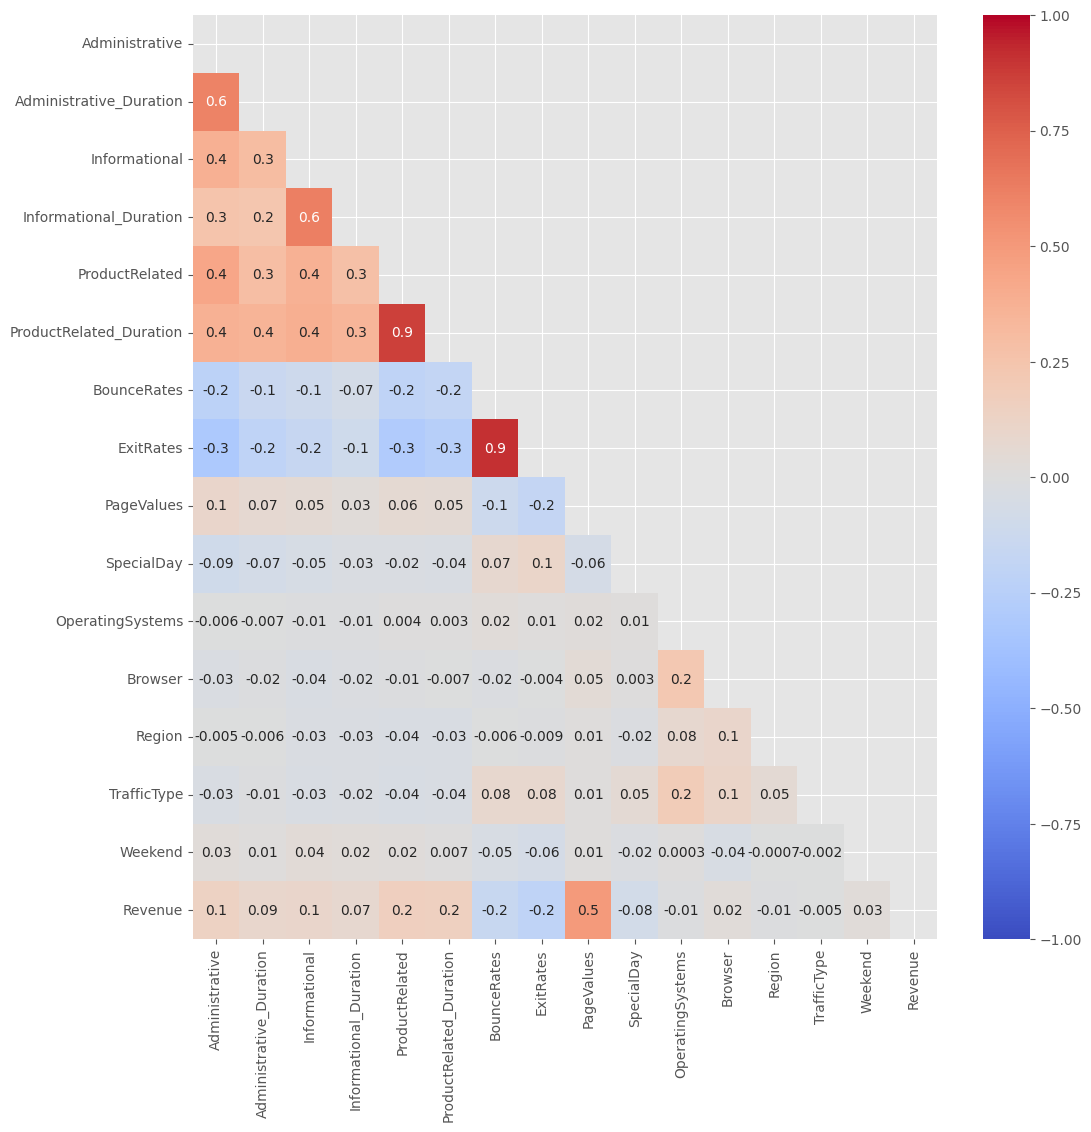

In [ ]:
matrix = np.triu(df.corr())
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='coolwarm')

plt.show()

From the above heatmap, we observe the following:

1.  The very few cases of high correlation (|corr| >= 0.7) are: BounceRates & ExitRates (0.9). ProductRelated & ProductRelated_Duration (0.9).
2.  Moderate Correlations (0.3 < |corr| < 0.7) are: Among the following features: Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, and ProductRelated_Duration. Also between PageValues and Revenue

In [ ]:
df['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

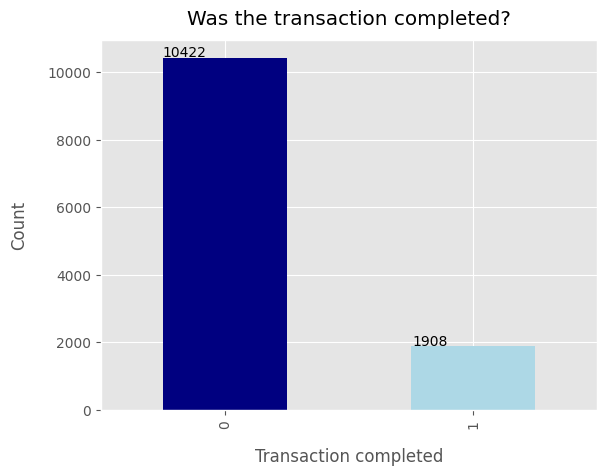

In [ ]:
ax= df['Revenue'].value_counts().plot(kind='bar', color = ['navy', 'lightblue'])
#ax.set_facecolor('white')
plt.xlabel("Transaction completed", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Was the transaction completed?", y=1.02)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [ ]:
import seaborn as sea

1. there are celarly lots more of non-transactions entries as when Revenue = 1 is means there was a transaction
2. It also shows the dataset is clearly inbalanced and there is over 5 times the amount of non-transactions as there is transaction

# **Revenue split by months**

(0.0, 4000.0)

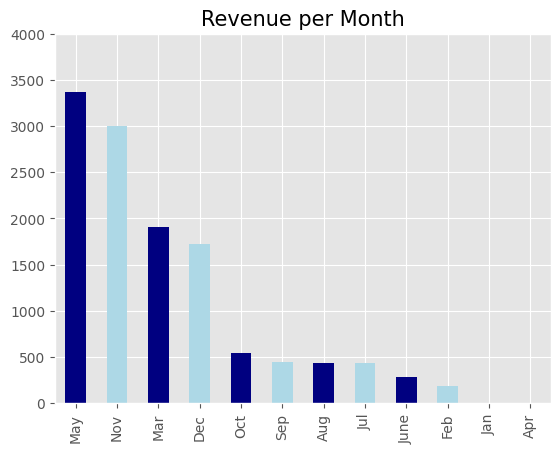

In [ ]:
ax= df['Month'].value_counts().plot(kind='bar', color = ['navy', 'lightblue'])
plt.title('Revenue per Month', fontsize=15)
plt.ylim(0,4000)

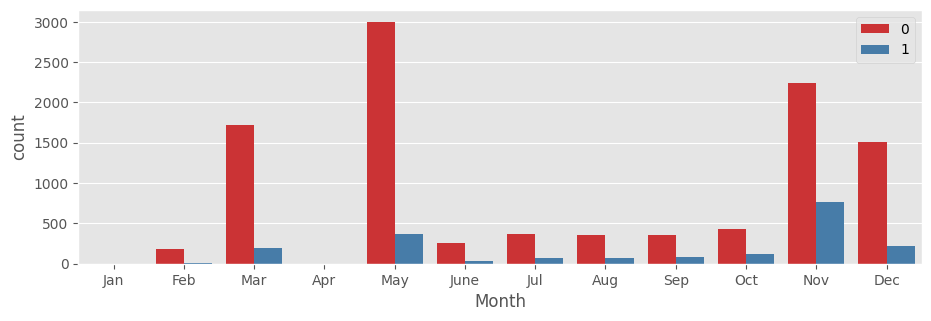

In [ ]:
#Visitor Analysis
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(2, 2, 1)
sns.countplot(data=df, x='Month', hue='Revenue', ax=ax1, palette= "Set1")
ax1.legend(loc='upper right')
plt.tight_layout()
plt.show()

We can see that the months of March, May, November and December had the most entreis

1. We can see that the for each month it is quite low for actual transactions. 
2. However the proportion is still the same for each month as the sales with the months of March, May, November and December having the most entreis

In [ ]:
df['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Jan        0
Apr        0
Name: Month, dtype: int64

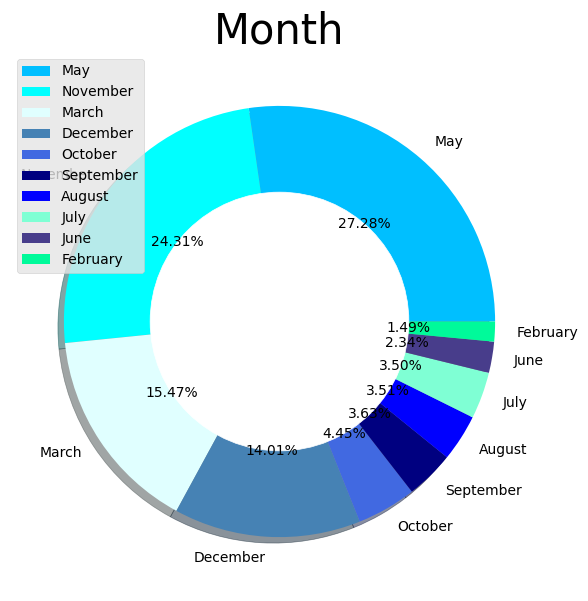

In [ ]:
# creating a donut chart for the months variations
# plotting a pie chart for share of special days
size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['deepskyblue', 'aqua', 'lightcyan', 'steelblue', 'royalblue', 'navy', 'blue', 'aquamarine', 'darkslateblue', 'mediumspringgreen', 'azure', 'bluevio;et']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.rcParams['figure.figsize'] = (18, 7)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Month', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()
plt.show()

- the same as above just in pie chart

# **Browsers and Operating Systems**

Operating System

In [ ]:
# Checking the no. of Os's is having
df['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

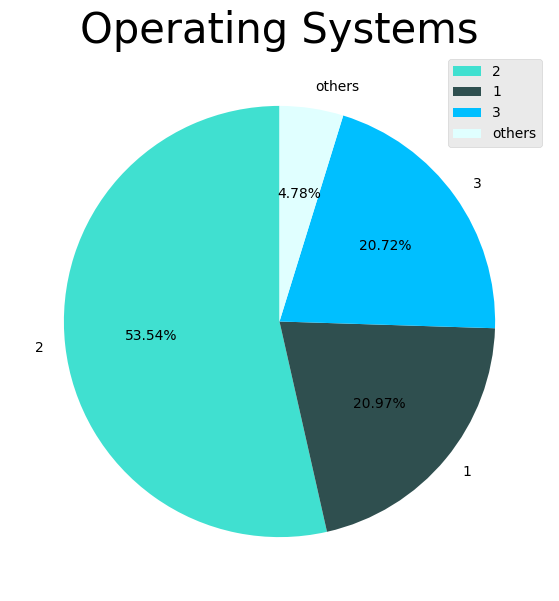

In [ ]:
# Plotting a pie chart for Operating Systems
plt.rcParams['figure.figsize'] = (18, 7)
size = [6601, 2585, 2555, 589]
colors = ['turquoise', 'darkslategray', 'deepskyblue', 'lightcyan']
labels = "2", "1", "3", "others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%', startangle=90)
plt.title('Operating Systems', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

broswers

In [ ]:
# Checking the no. of Browser is having
df['Browser'].value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

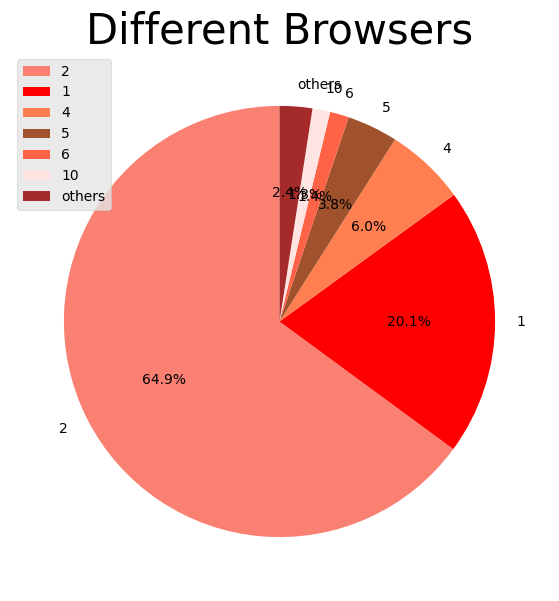

In [ ]:
#Ploting a pie chart for operating systems
plt.rcParams['figure.figsize'] = (18, 7)

size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['salmon', 'red', 'coral', 'sienna', 'tomato', 'mistyrose', 'brown']
labels = "2", "1", "4", "5", "6", "10", "others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, autopct = '%.1f%%', startangle = 90)
plt.title('Different Browsers', fontsize = 30)
plt.axis('On')
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


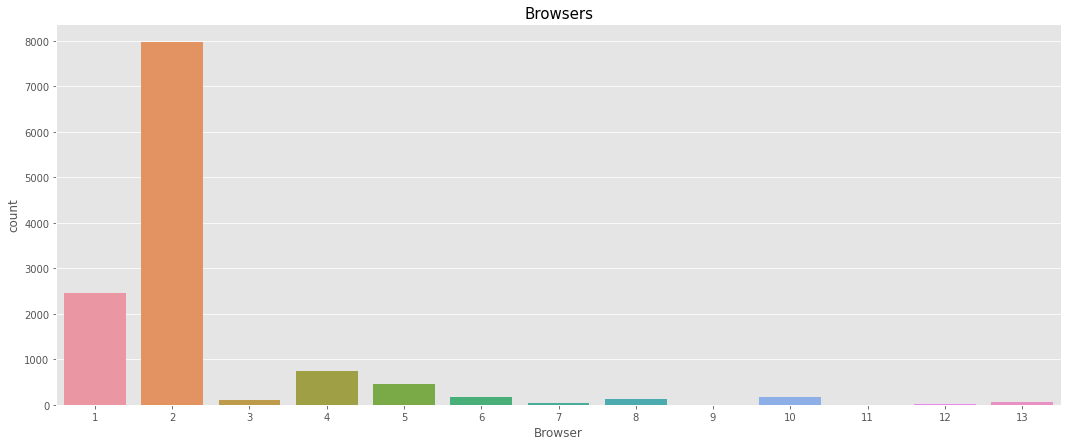

In [ ]:
#Visualizing Browser bar graph
numbers= [1,2,3,4,5,6,7,8,9,10,11,12,13]
browser = df['Browser'].value_counts()
sea.countplot(df['Browser'],order=numbers)
plt.title('Browsers', fontsize=15)
plt.show()

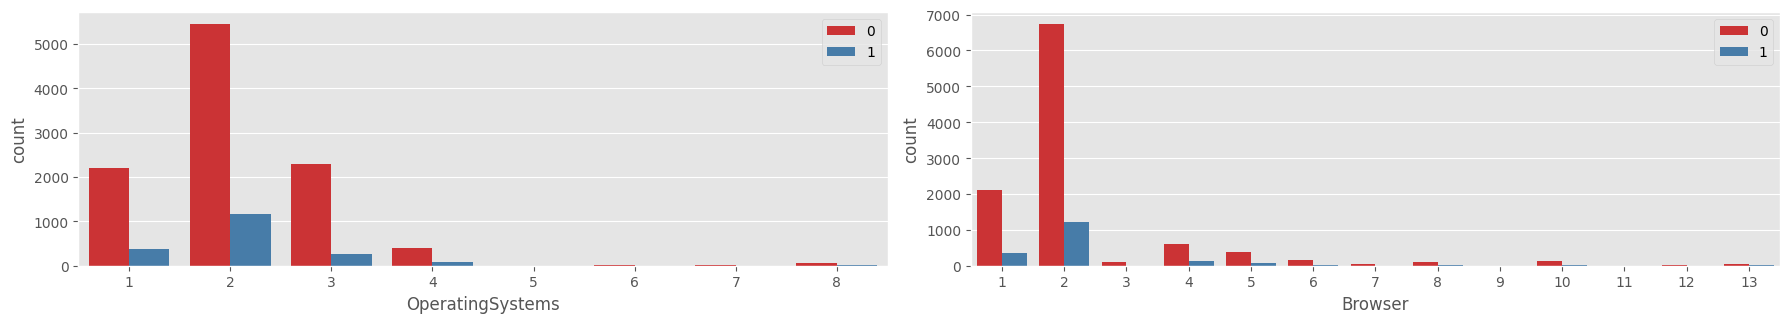

In [ ]:
#Visitor Analysis
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
sns.countplot(data=df, x='OperatingSystems', hue='Revenue', ax=ax1, palette= "Set1")
sns.countplot(data=df, x='Browser', hue='Revenue', ax=ax2, palette= "Set1")
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

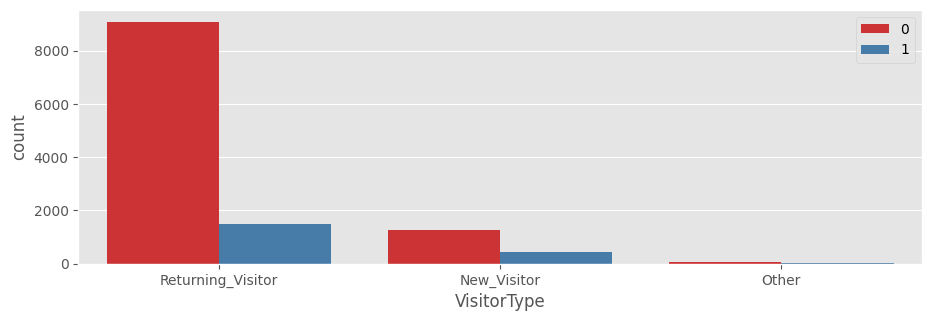

In [ ]:
#Visitor Analysis
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(2, 2, 1)

sns.countplot(data=df, x='VisitorType', hue='Revenue', ax=ax1, palette= "Set1")

ax1.legend(loc='upper right')
plt.tight_layout()
plt.show()

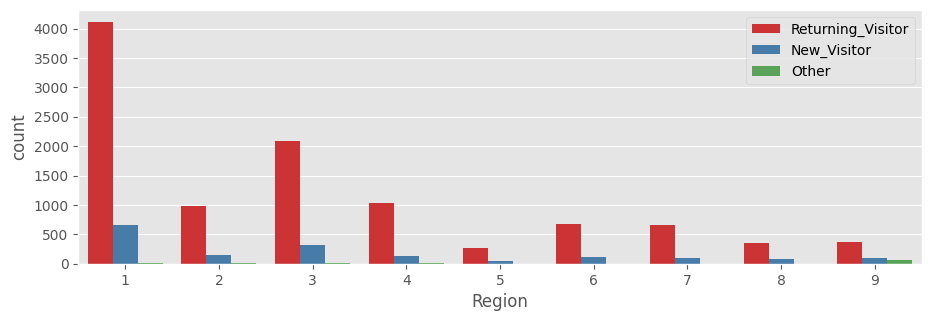

In [ ]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(2, 2, 1)

sns.countplot(data=df, x='Region', hue='VisitorType', ax=ax1, palette= "Set1")

ax1.legend(loc='upper right')

plt.tight_layout()
plt.show()

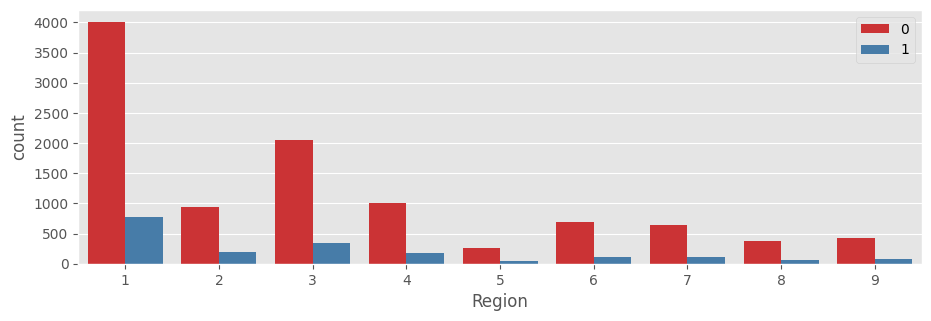

In [ ]:
#Visitor Analysis
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(2, 2, 1)

sns.countplot(data=df, x='Region', hue='Revenue', ax=ax1, palette= "Set1")

ax1.legend(loc='upper right')
plt.tight_layout()
plt.show()

Google Analytics Features

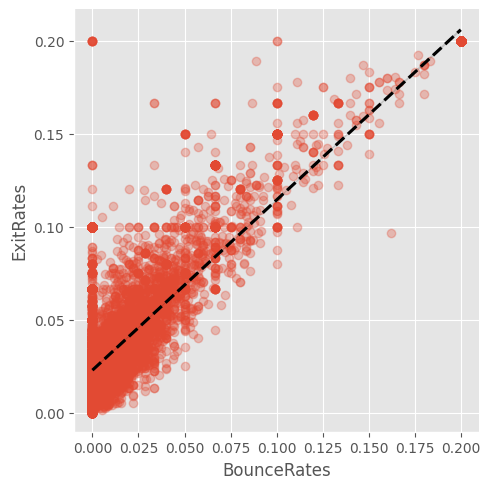

In [ ]:
# Bounce Rate vs Exit Rate

sns.lmplot(x="BounceRates", y="ExitRates", data=df, 
           scatter_kws={'alpha':0.3}, 
           line_kws={'color':'black', 'ls':'--'})
plt.show()

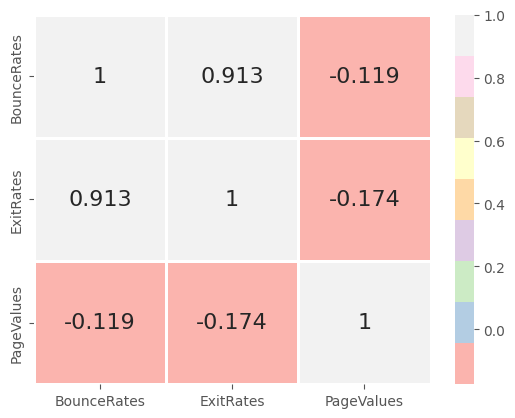

In [ ]:
google_analytics_features = ['BounceRates', 'ExitRates', 'PageValues']
corr_mat = df[google_analytics_features].corr()
sns.heatmap(corr_mat, annot=True,annot_kws={'fontsize':16}, fmt='.3g', linewidths=2, cmap='Pastel1')
plt.show()

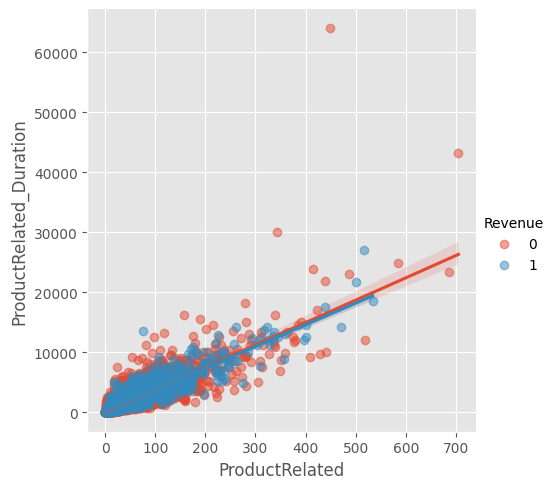

In [ ]:
# Impact of ProductRelated Page Views and ProductRelated Pageview Duration on Revenue
sns.lmplot(x="ProductRelated", y="ProductRelated_Duration", hue='Revenue', data=df, scatter_kws={'alpha':0.5})
plt.show()

In [ ]:
google_analytics_features = ['BounceRates', 'ExitRates', 'PageValues']

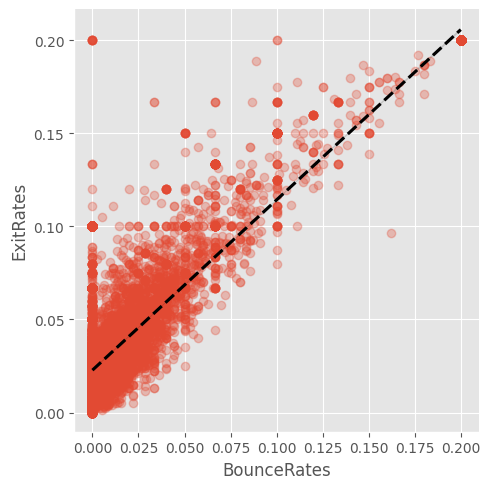

In [ ]:
# Bounce Rate vs Exit Rate

sns.lmplot(x="BounceRates", y="ExitRates", data=df, 
           scatter_kws={'alpha':0.3}, 
           line_kws={'color':'black', 'ls':'--'})
plt.show()

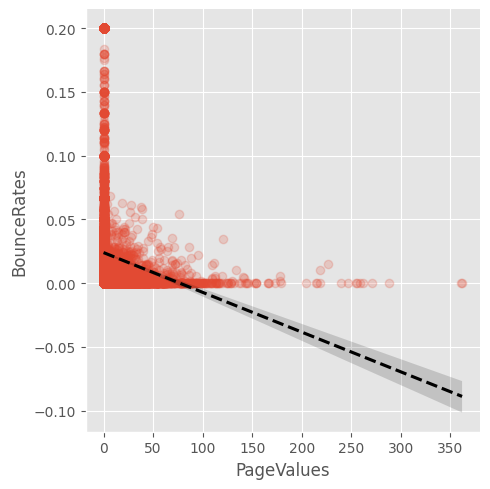

In [ ]:
# Page Value versus Bounce Rate

sns.lmplot(x="PageValues", y="BounceRates" , 
           data=df, scatter_kws={'alpha':0.2},
          line_kws={'color':'black', 'ls':'--'})
plt.show()

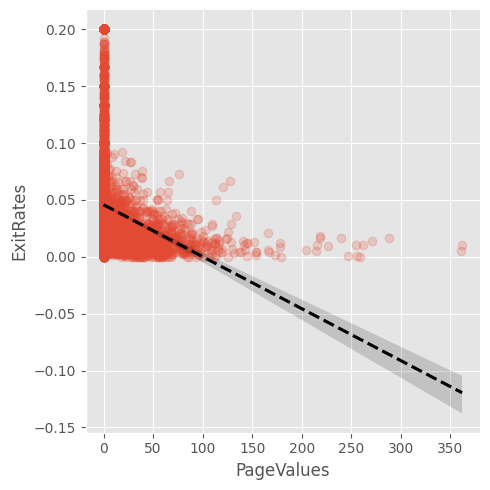

In [ ]:
# Page Value versus Exit Rate

sns.lmplot(x="PageValues", y="ExitRates" , 
           data=df, scatter_kws={'alpha':0.2}, 
           line_kws={'color':'black', 'ls':'--'})
plt.show()

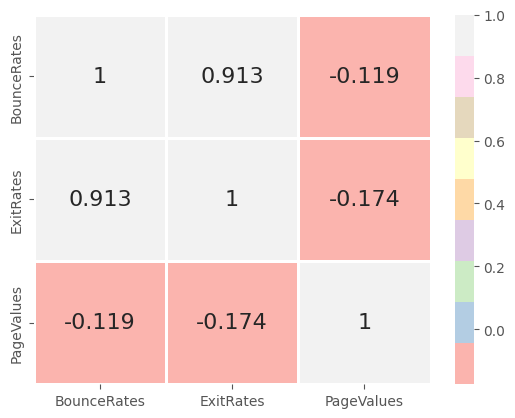

In [ ]:
corr_mat = df[google_analytics_features].corr()
sns.heatmap(corr_mat, annot=True,annot_kws={'fontsize':16}, fmt='.3g', linewidths=2, cmap='Pastel1')
plt.show()

Outliers

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


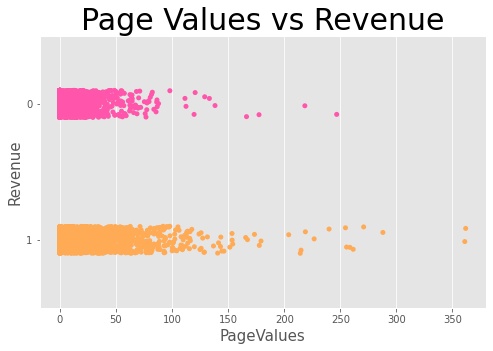

In [ ]:
# strip plot for page values vs revenue
plt.rcParams['figure.figsize'] = (8, 5)

sns.stripplot(df['PageValues'], df['Revenue'], palette = 'spring', orient = 'h')
plt.title('Page Values vs Revenue', fontsize = 30)
plt.xlabel('PageValues', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

In [ ]:
sns.stripplot(data=df, y="Revenue", x="BounceRates")

<Axes: xlabel='BounceRates', ylabel='Revenue'>

Error in callback <function flush_figures at 0x7fa32945f940> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
# strip plot for bounce rates vs revenue
plt.rcParams['figure.figsize'] = (8, 5)

sns.stripplot(df['BounceRates'], df['Revenue'], palette = 'autumn', orient = 'h')
plt.title('Bounce Rates vs Revenue', fontsize = 30)
plt.xlabel('Bounce Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

TypeError: ignored

Web Page Analysis

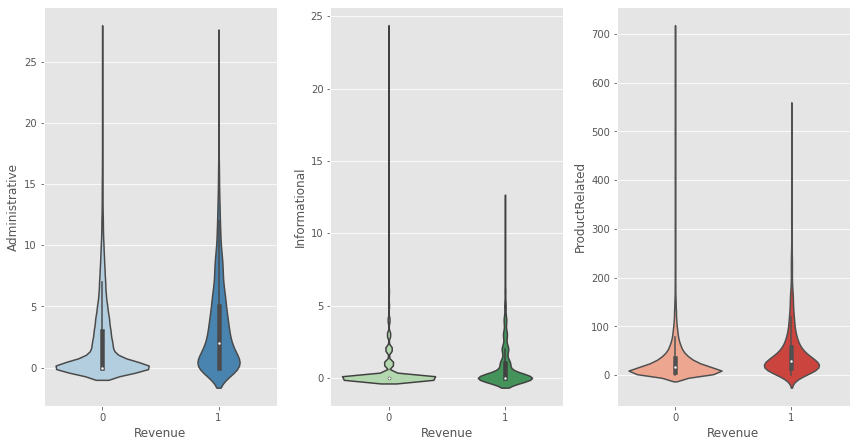

In [ ]:
fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)

sns.violinplot(data=df, x = 'Revenue', y= 'Administrative', ax=ax1, palette="Blues")
sns.violinplot(data=df, x = 'Revenue', y = 'Informational', ax=ax2, palette ='Greens')
sns.violinplot(data=df, x = 'Revenue', y = 'ProductRelated', ax=ax3, palette= 'Reds')


plt.tight_layout()
plt.show()

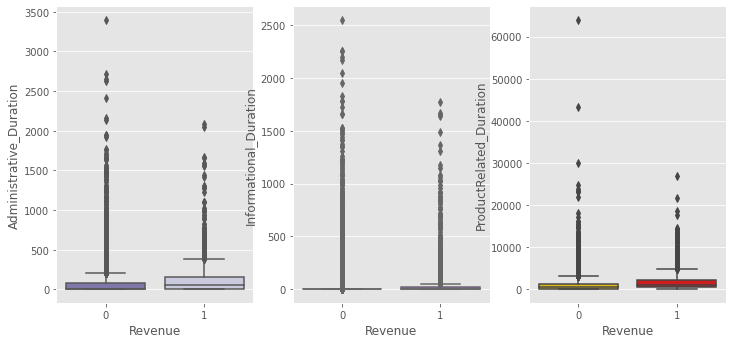

In [ ]:
fig = plt.figure(figsize=(12, 12))

ax4 = fig.add_subplot(2, 3, 1)
ax5 = fig.add_subplot(2, 3, 2)
ax6 = fig.add_subplot(2, 3, 3)

sns.boxplot(data=df, x = 'Revenue', y = 'Administrative_Duration', ax=ax4 , palette = "Purples_r")
sns.boxplot(data=df, x = 'Revenue', y = 'Informational_Duration', ax=ax5, palette = 'cool')
sns.boxplot(data=df, x = 'Revenue', y = 'ProductRelated_Duration', ax=ax6, palette ='hot_r')

From the above boxplots, we can see that:

In general, visitors tend to visit less pages, and spend less time, if they are not going to make a purchase.
The number of product related pages, and the time spent on them, is way higher than that for account related or informational pages.
The first 3 feature look like they follow a skewed normal distribution.

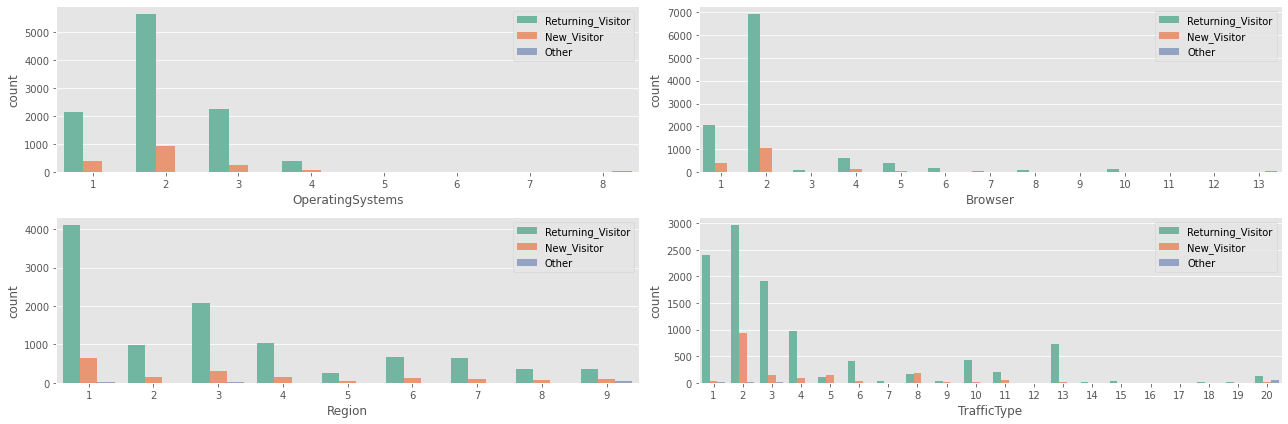

In [ ]:
#Visitor Analysis
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.countplot(data=df, x='OperatingSystems', hue='VisitorType', ax=ax1, palette= "Set2")
sns.countplot(data=df, x='Browser', hue='VisitorType', ax=ax2, palette= "Set2")
sns.countplot(data=df, x='Region', hue='VisitorType', ax=ax3, palette= "Set2")
sns.countplot(data=df, x='TrafficType', hue='VisitorType', ax=ax4, palette= "Set2")

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
ax4.legend(loc='upper right')
plt.tight_layout()
plt.show()

1 Operating system is responsible for ~7000 of the examples in our dataset.
4 of the 8 operating systems used, are responsible of a very small number (<200) of the examples in our dataset.
A similar story repeated with the browsers used by visitors, where there is 1 dominant browser, 3 with decent representation in the dataset, and the rest are rarey used.
It looks like we have a very regionally diverse traffic in our dataset.
Also Traffic sources are very diverse, with a few that did not contribute much to the dataset.

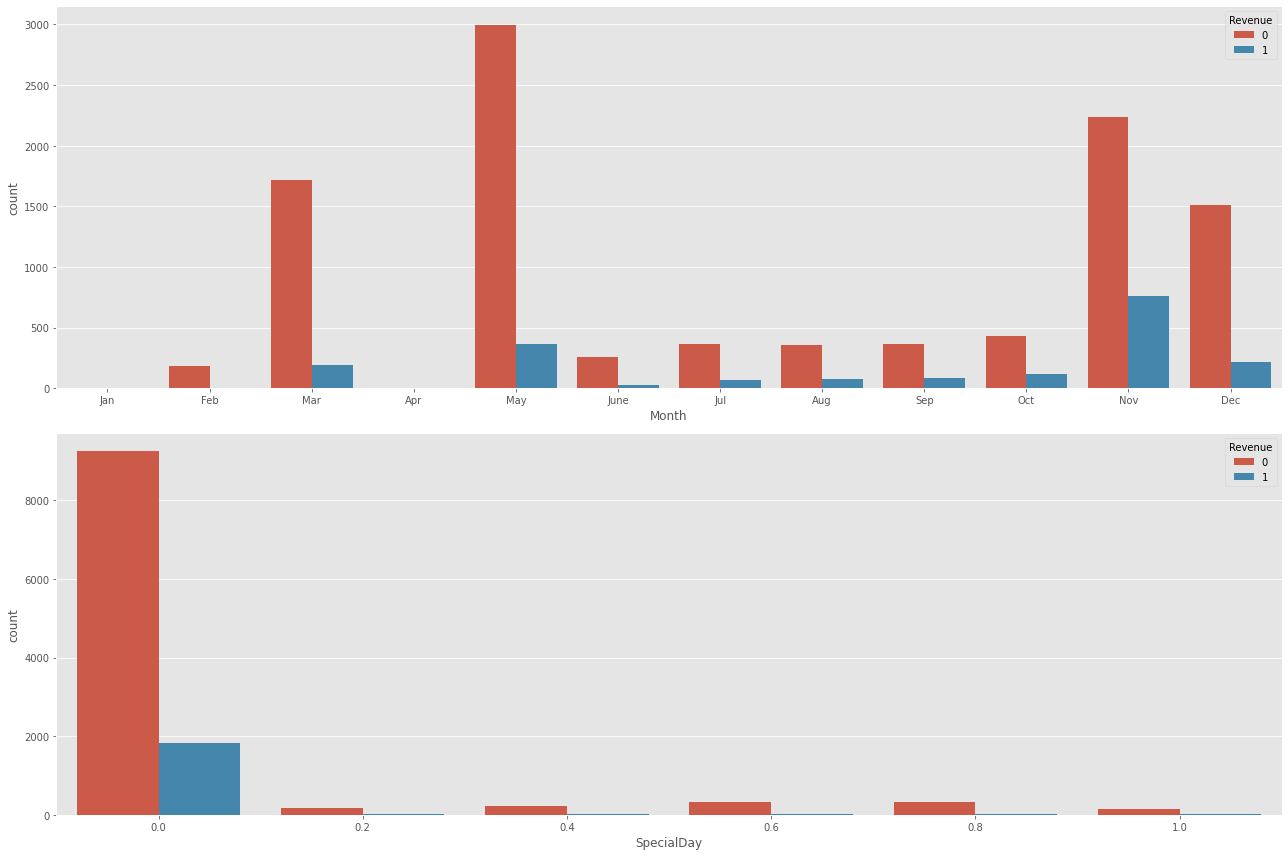

In [ ]:
#visit data analysis
fig = plt.figure(figsize=(18, 12))

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

orderlist = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
sns.countplot(data=df, x='Month', hue='Revenue', ax=ax1, order=orderlist)
sns.countplot(data=df, x='SpecialDay', hue='Revenue', ax=ax2)

plt.tight_layout()
plt.show()

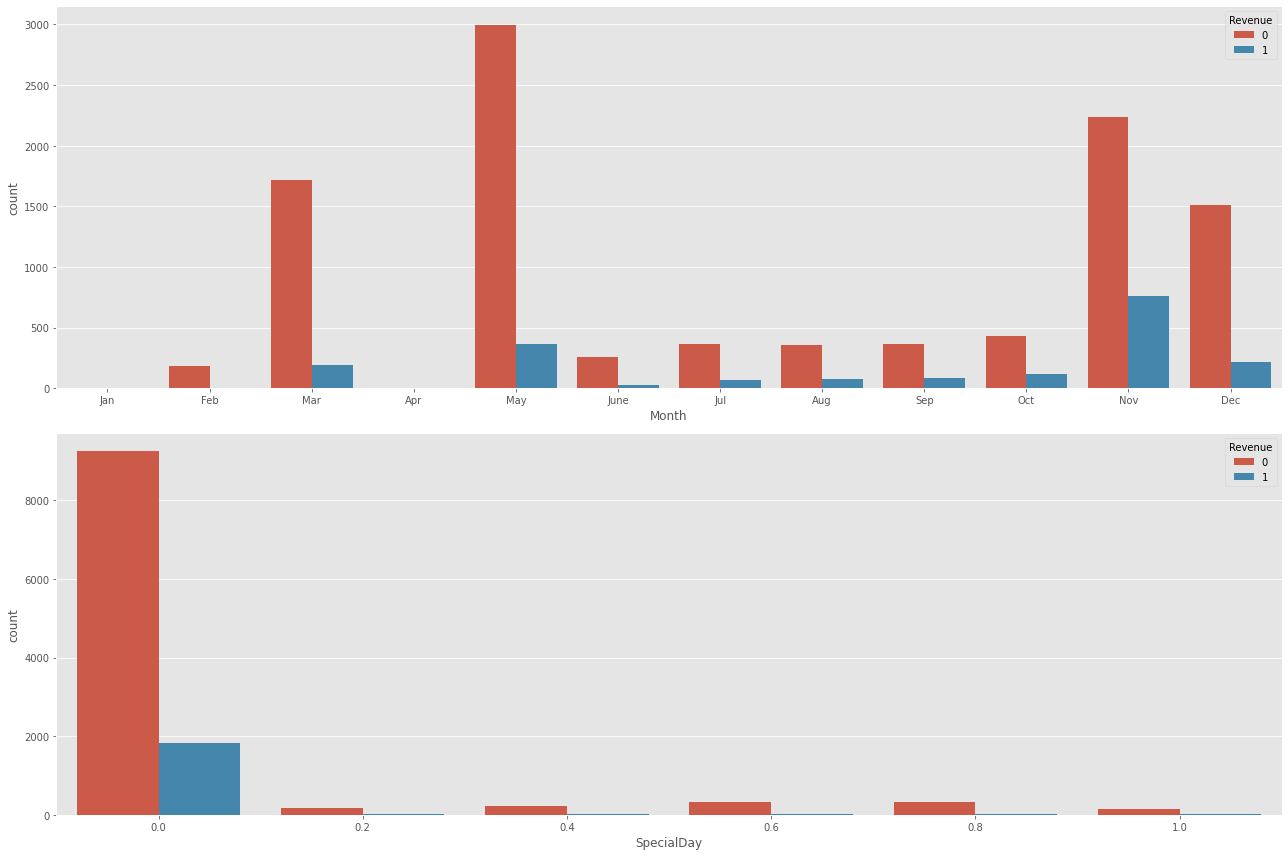

In [ ]:
#visit data analysis
fig = plt.figure(figsize=(18, 12))

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

orderlist = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
sns.countplot(data=df, x='Month', hue='Revenue', ax=ax1, order=orderlist)
sns.countplot(data=df, x='SpecialDay', hue='Revenue', ax=ax2)

plt.tight_layout()
plt.show()

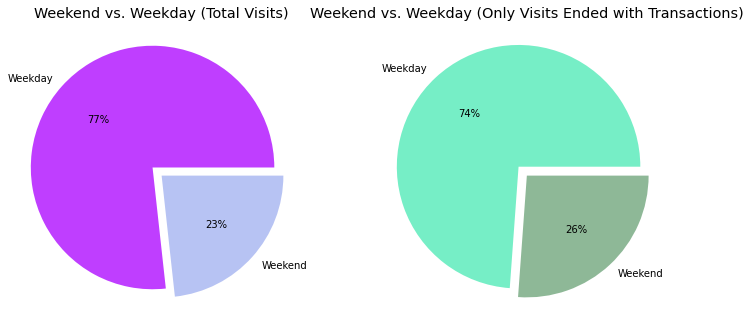

In [ ]:
fig, ax = plt.subplots(1, 2,figsize=(12, 6), subplot_kw=dict(aspect="equal"))
colors = ['#BF3EFF', '#B7C3F3']
ax[0].pie(df['Weekend'].value_counts(),explode=(0.1,0),labels=['Weekday','Weekend'], autopct='%1.0f%%', colors= colors)
ax[0].set_title('Weekend vs. Weekday (Total Visits)')
colors= ['#76EEC6', '#8EB897']
ax[1].pie(df[df['Revenue'] == 1]['Weekend'].value_counts(),explode=(0.1,0),labels=['Weekday','Weekend'], autopct='%1.0f%%', colors= colors)
ax[1].set_title('Weekend vs. Weekday (Only Visits Ended with Transactions)')
plt.show()

On March and May, we have a lot of visits (May is the month with the highest number of visits), yet transactions made during those 2 months are not on the same level.
We have no visits at all during Jan nor Apr.
Most transactions happen during the end of the year, with Nov as the month with the highest number of confirmed transactions.
The closer the visit date to a special day (like black Friday, new year's, ... etc) the more likely it will end up in a transaction.
Most of transactions happen on special days (SpecialDay =0).
It does not look like weekends affect the number of visits or transactions much, we can see only a slight increase in the number of transactions happening on weekends compared to those on weekdays.

In [ ]:
def plot_data_count(df, col, return_pct_share=True, hue=None, figsize=(12,6)):
    
    plt.figure(figsize=figsize)
    g = sns.countplot(data=df, x=col, hue=hue)
    for rect in g.patches:
        h = rect.get_height()
        w = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()
        g.annotate(f"{h}", (x+w/2, h), ha='center', va='bottom', fontsize=12)
    g.spines['top'].set_visible(False)
    g.spines['right'].set_visible(False)
    g.spines['left'].set_visible(False)
    
    plt.show()
    
    if return_pct_share:
        print("\n")
        print("Percent share for each category:")
        print(df[col].value_counts(normalize=True)*100)

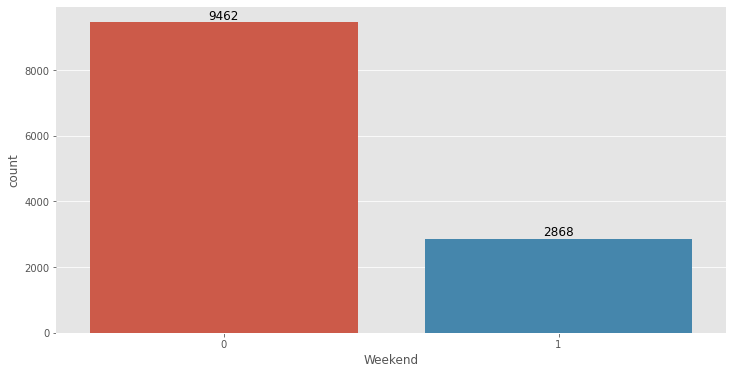



Percent share for each category:
0    76.739659
1    23.260341
Name: Weekend, dtype: float64


In [ ]:
plot_data_count(df, 'Weekend')

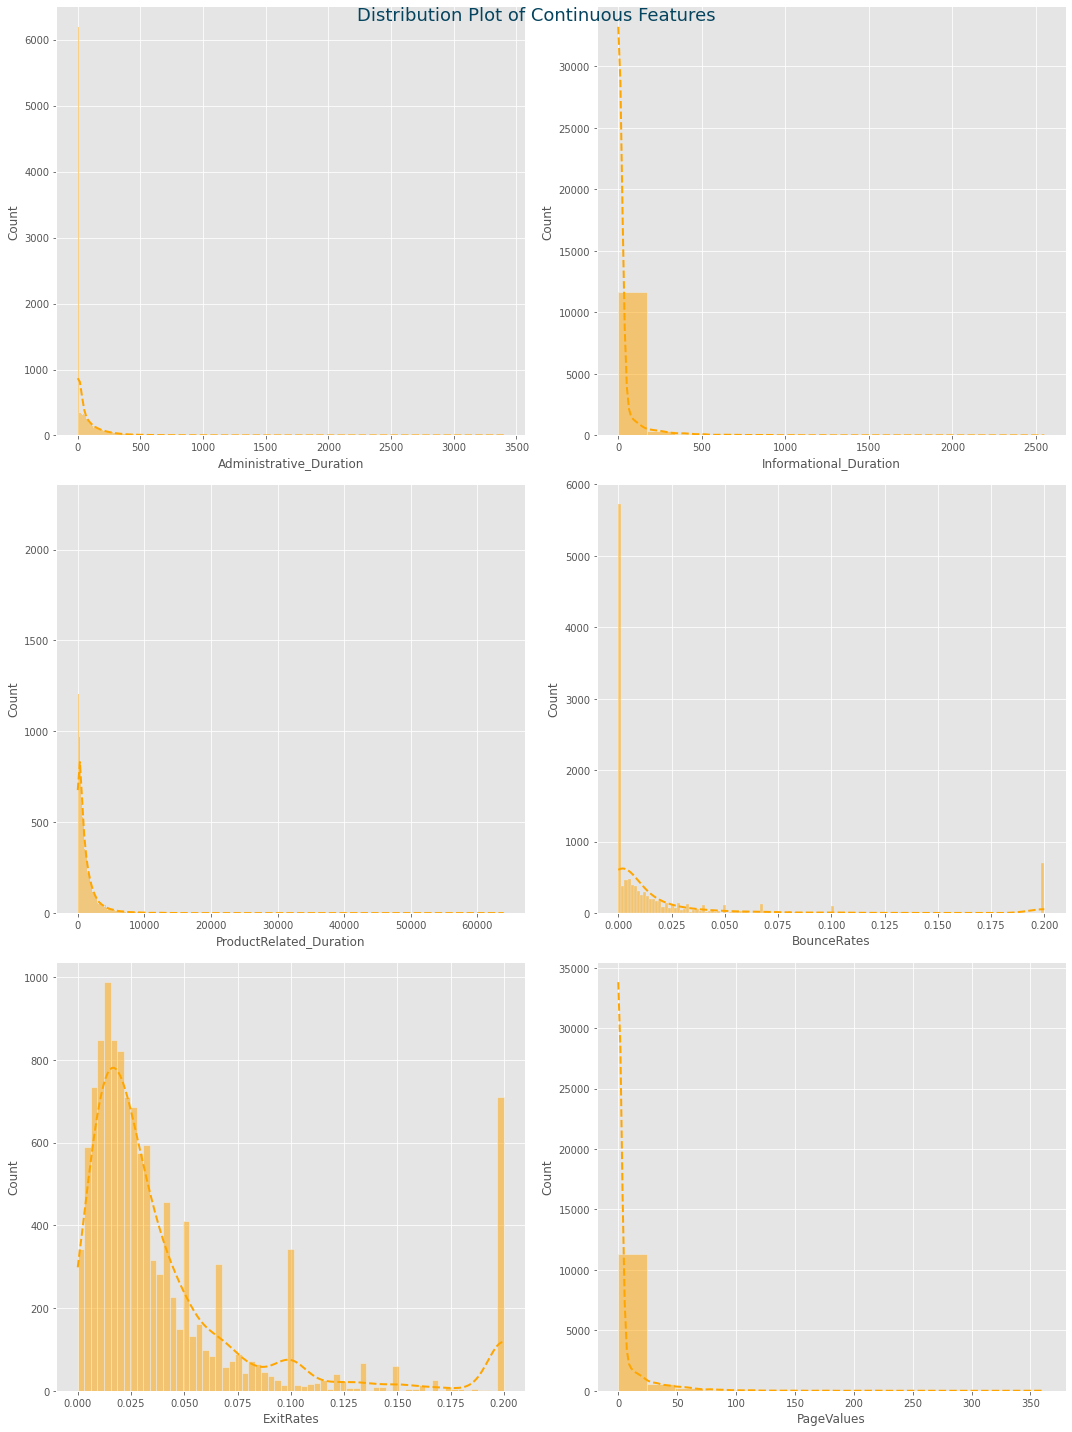

In [ ]:
continuous_features = ['Administrative_Duration', 
                       'Informational_Duration', 
                       'ProductRelated_Duration', 
                       'BounceRates', 
                       'ExitRates', 
                       'PageValues']

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,20))
axs = np.ravel(axs)
for i, col in enumerate(continuous_features):
    plt.sca(axs[i])
    sns.histplot(data=df, x=col, kde=True, line_kws={'lw':2, 'ls':'--'}, color='orange')

plt.suptitle("Distribution Plot of Continuous Features", fontsize=18, color='#05445E', va='bottom')
plt.tight_layout()
plt.show()

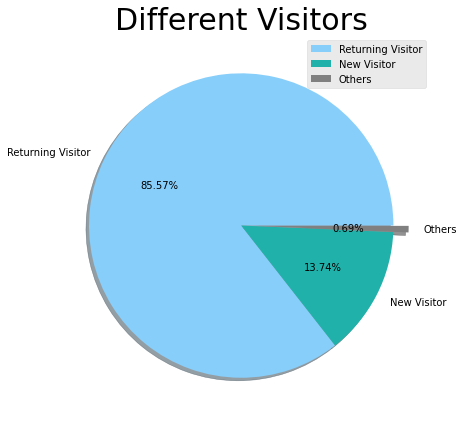

In [ ]:
# plotting a pie chart for Visitors

plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['lightskyblue', 'lightseagreen', 'grey']
labels = "Returning Visitor", "New Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

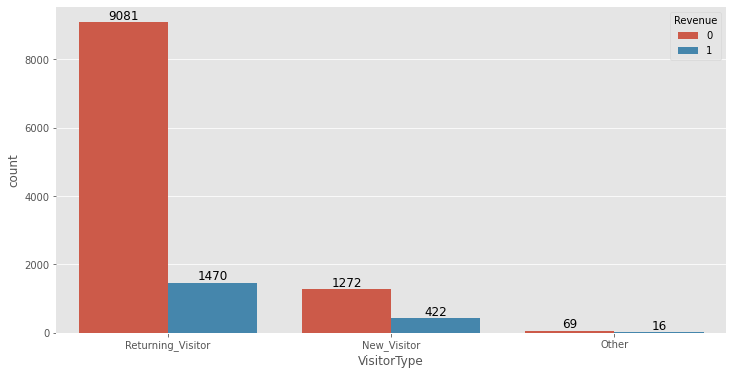

In [ ]:
## Visitor type
plot_data_count(df, col='VisitorType', return_pct_share=False, hue='Revenue')

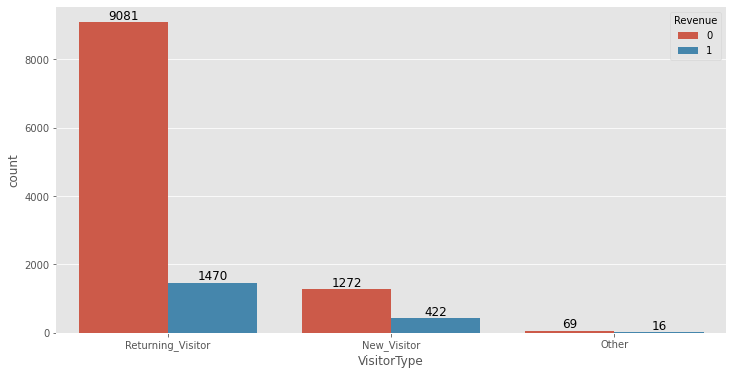

In [ ]:
## Visitor type
plot_data_count(df, col='VisitorType', return_pct_share=False, hue='Revenue')

- more revenue conversion happens for returning customers than new customers.
- we need to give incentives to new customers to make purchase with us.
- First let's check whether Revenue is independent or dependent on visitor type by chi-squared test

In [ ]:
from scipy import stats
def chi_squared_test_result(col):
    
    x = df.groupby(['Revenue', col])[col].count().unstack(1).fillna(0).astype('int')
    test_results = stats.chi2_contingency(x.values)
    pval = test_results[1]
    if pval<0.05:
        print(f"P-value: {pval:.4f} - \n\nIt means we can **reject the null hypothesis (at 95% CI)** and conclude that **Revenue is dependent on {col}.**")
    else:
        print(f"P-value: {pval:.4f} - \n\nFailed to reject null hypothesis. Both **Revenue is independent on {col}.**")

In [ ]:
chi_squared_test_result('VisitorType')

P-value: 0.0000 - 

It means we can **reject the null hypothesis (at 95% CI)** and conclude that **Revenue is dependent on VisitorType.**


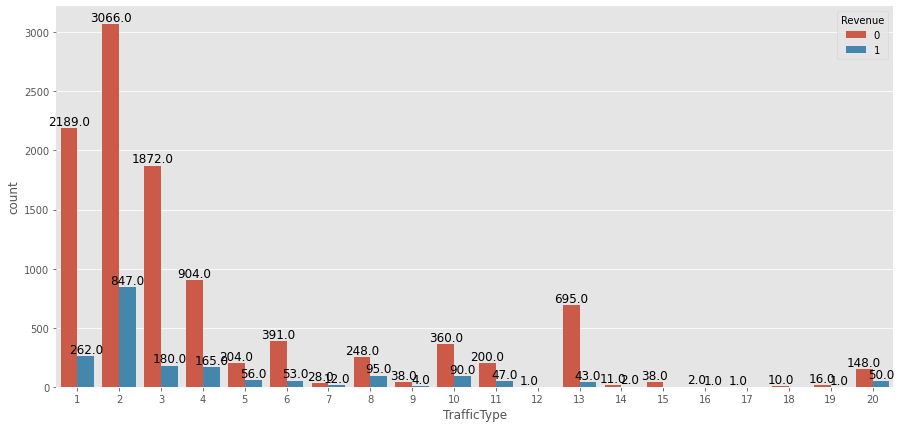

P-value: 0.0000 - 

It means we can **reject the null hypothesis (at 95% CI)** and conclude that **Revenue is dependent on TrafficType.**


In [ ]:
## Revenue and Traffic Type

plot_data_count(df, col='TrafficType', return_pct_share=False, hue='Revenue', figsize=(15,7))

# chi-squared test
chi_squared_test_result('TrafficType')

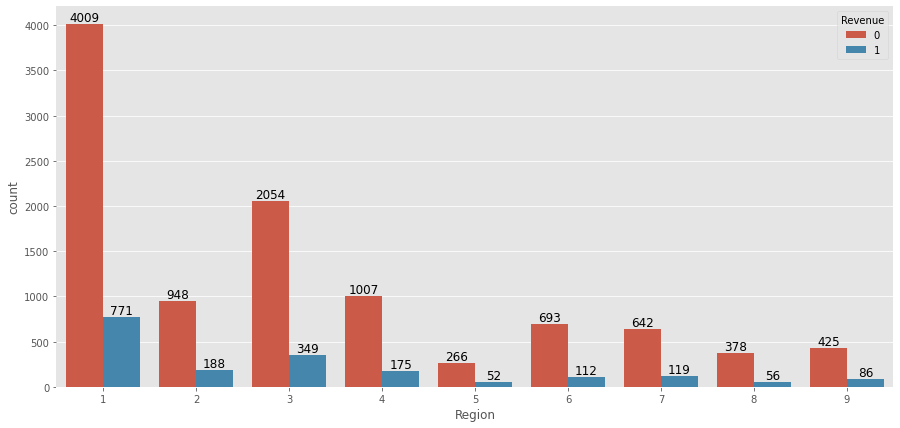

P-value: 0.3214 - 

Failed to reject null hypothesis. Both **Revenue is independent on Region.**


In [ ]:
## Revenue and Region

plot_data_count(df, col='Region', return_pct_share=False, hue='Revenue', figsize=(15,7))

# chi-squared test
chi_squared_test_result('Region')

- Region 1 accounts for most sales, and region 3 the second most. With this information, we can plan our marketing and supply chain activities in a better way. For example, we might propose building a warehouse specifically catering to the needs of region 1 to increase delivery rates and ensure that products in the highest demand are always well stocked.

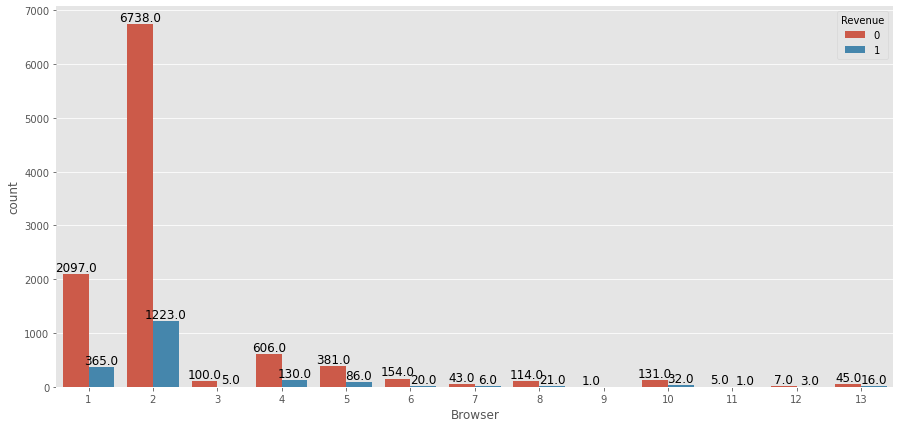

P-value: 0.0061 - 

It means we can **reject the null hypothesis (at 95% CI)** and conclude that **Revenue is dependent on Browser.**


In [ ]:
## Revenue and Browser

plot_data_count(df, col='Browser', return_pct_share=False, hue='Revenue', figsize=(15,7))

# chi-squared test
chi_squared_test_result('Browser')

- more revenue-generating transactions have been performed from Browser 2. Even though Browser 1 creates a considerable number of sessions, the conversion rate is low. This is something we need to investigate further.

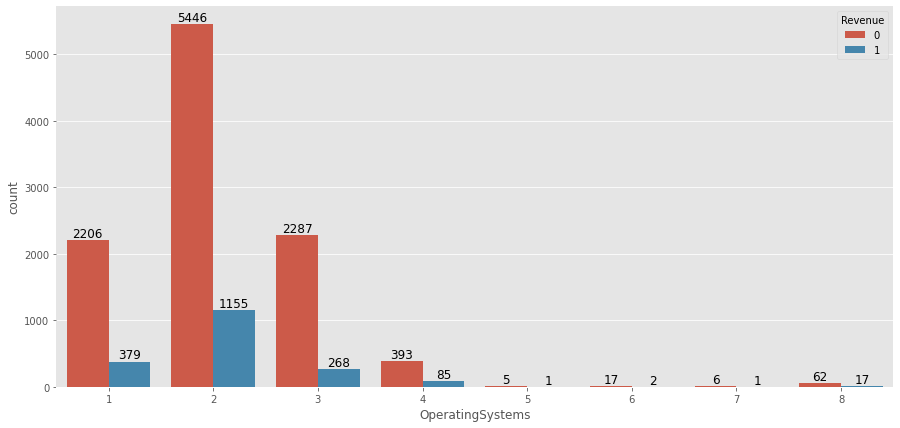

P-value: 0.0000 - 

It means we can **reject the null hypothesis (at 95% CI)** and conclude that **Revenue is dependent on OperatingSystems.**


In [ ]:
## Revenue and OperatingSystems

plot_data_count(df, col='OperatingSystems', return_pct_share=False, hue='Revenue', figsize=(15,7))

# chi-squared test
chi_squared_test_result('OperatingSystems')

- more revenue-generating transactions happened with OS 2 than the other types.

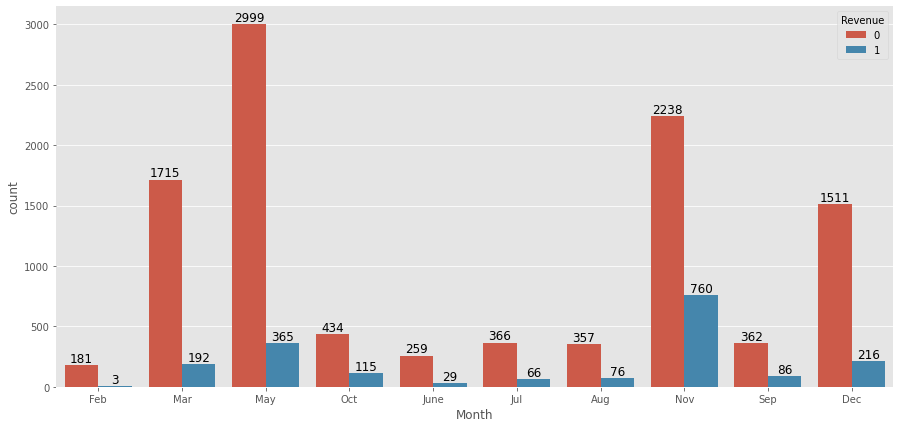

P-value: 0.0000 - 

It means we can **reject the null hypothesis (at 95% CI)** and conclude that **Revenue is dependent on Month.**


In [ ]:
## Revenue and Month

plot_data_count(df, col='Month', return_pct_share=False, hue='Revenue', figsize=(15,7))

# chi-squared test
chi_squared_test_result('Month')

- Website visitors may be high in May, but we can observe from the preceding bar plot that a greater number of purchases were made in the month of November.

Google analytics features

types of pages

In [ ]:
type_of_pages = ['Administrative', 'Informational', 'ProductRelated']

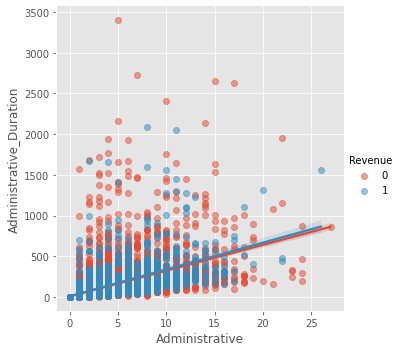

In [ ]:
# Impact of Administrative Page Views and Administrative Pageview Duration on Revenue

sns.lmplot(x="Administrative", y="Administrative_Duration", 
           hue='Revenue', data=df, scatter_kws={'alpha':0.5})
plt.show()

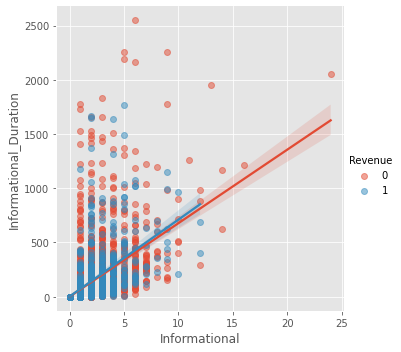

In [ ]:
# Impact of Information Page Views and Information Pageview Duration on Revenue

sns.lmplot(x="Informational", y="Informational_Duration", 
           hue='Revenue', data=df, scatter_kws={'alpha':0.5})
plt.show()

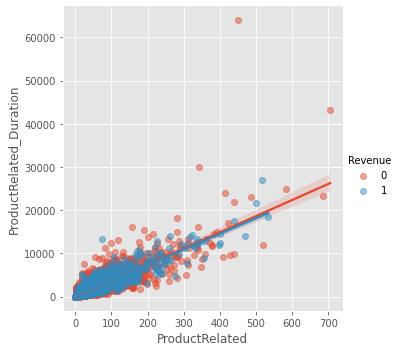

In [ ]:
# Impact of ProductRelated Page Views and ProductRelated Pageview Duration on Revenue

sns.lmplot(x="ProductRelated", y="ProductRelated_Duration", 
           hue='Revenue', data=df, scatter_kws={'alpha':0.5})
plt.show()

- All type of pages and their duration are positively correlated. With an increase in the number of page-views, the page-view duration also increases.
- Customers who have made online purchases visited fewer numbers of pages.
- This implies that page-views don't have much effect on revenue generation.

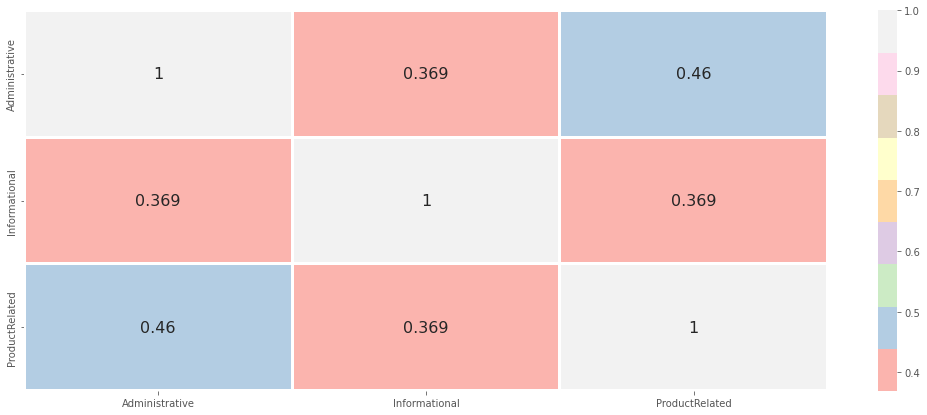

In [ ]:
corr_mat = df[type_of_pages].corr(method='spearman')
sns.heatmap(corr_mat, annot=True,annot_kws={'fontsize':16}, fmt='.3g', linewidths=2, cmap='Pastel1')
plt.show()

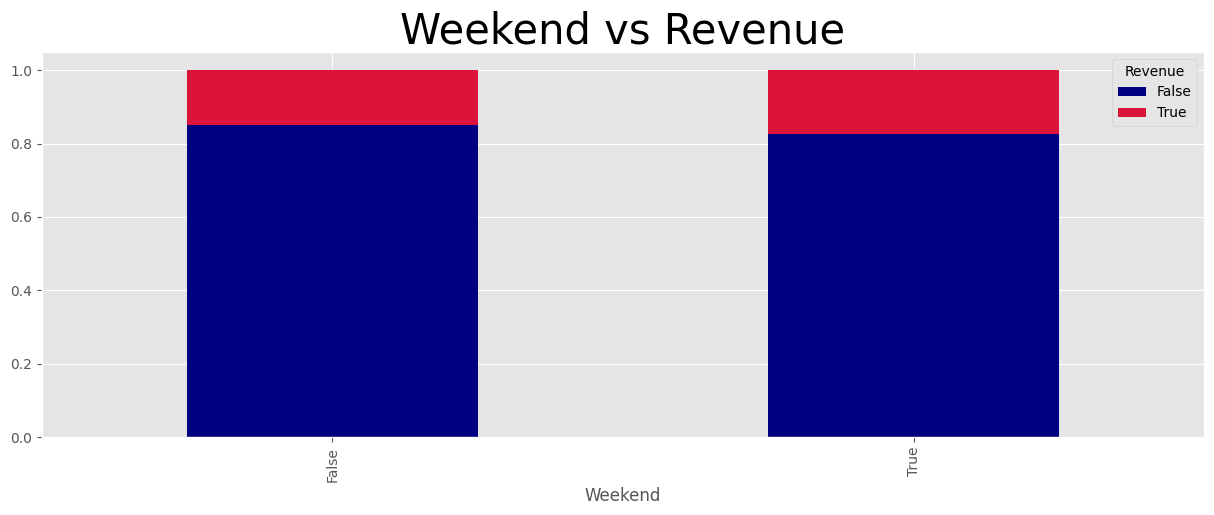

In [ ]:
# bar plot for weekend vs Revenue
df = pd.crosstab(df['Weekend'], df['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['navy', 'crimson'])
plt.title('Weekend vs Revenue', fontsize = 30)
plt.show()

Conclsuions:

- The conversion rates of new visitors are high compared to those of returning customers.
- It's a good sign that 85% of visitors are returning to site. 15% of visitors are new. We can give offers to lure more new visitors.
- While the number of returning customers to the website is high, the conversion rate is low compared to that of new customers.
- 65% of visitors come from browser only 1 and more than 85% of visitors come from browser 1 and 2. We can make website to more appealing, interactive and responsive to these browsers.
- Approx 95% of visitors uses operating system 1, 2, or 3.
Region 1 accounts for more sales followed by region 3.
- Month May and November have the highest visitors but only November month has more conversion rate.
- Average spends on administrative, informational, and products related pages is more for those who bought something than those who nothing.
- Average Bounce Rate and Exit Rate is lower when a product sales.
- Pages with a high page value have a lower bounce rate. We should be talking with our tech team to find ways to improve the page value of the web pages.

- We see here PageValues is exponentially distributed for both purchased(True) or not puchased(False).
- We also see there are so many outliers in puchased(True) according to ExitRates.
- Most important things is here PageValues are highly influenced to purchased(True) a product.

- We see here BounceRates is exponentially distributed for both purchased(True) or not puchased(False).
- We also see there are so many outliers in not puchased(False) according to ExitRates.
BounceRates is highly influenced to buy a product or not.

- We see here Weekend is also a boolean column.
- There is nothing significant to describe here.